In [ ]:
!pip install snscrape

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import snscrape.modules.twitter as sntwitter
from plotly import graph_objs as go
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob
import re
import datetime

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Twitter Search Query
Max = 10000000
tweet_list = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Melbourne Lockdown since:2020-01-01 until:2021-11-29').get_items()):
  if i > Max:
    break
  tweet_list.append([tweet.date, tweet.id, tweet.content])

In [ ]:
len(tweet_list)

231054

In [ ]:
Tweet_list = pd.DataFrame(tweet_list, columns = ['Datetime', 'ID', 'Text'])

In [ ]:
Tweet_list.head()

Datetime  ...                                               Text
0 2021-11-28 23:50:50+00:00  ...  Has the #ThreeSewerRats lockdown #Melbourne ag...
1 2021-11-28 23:46:11+00:00  ...  Hey #antivaxxers you're literally going to cau...
2 2021-11-28 23:26:41+00:00  ...  Australia was last in the developed world to r...
3 2021-11-28 23:19:02+00:00  ...  Interesting piece from @danivalent on the lock...
4 2021-11-28 23:14:07+00:00  ...  @pavyg @NovakPoetry @AACH88132127 @Aeromom322C...

[5 rows x 3 columns]

In [ ]:
Tweet_list.to_csv("Tweet_List.csv") # This is stored on my google drive.

In [ ]:
Tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231054 entries, 0 to 231053
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   Datetime  231054 non-null  datetime64[ns, UTC]
 1   ID        231054 non-null  int64              
 2   Text      231054 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 5.3+ MB


In [ ]:
Tweet_list['Datetime'] = Tweet_list['Datetime'].dt.date

In [ ]:
Tweet_list

Datetime  ...                                               Text
0       2021-11-28  ...  Has the #ThreeSewerRats lockdown #Melbourne ag...
1       2021-11-28  ...  Hey #antivaxxers you're literally going to cau...
2       2021-11-28  ...  Australia was last in the developed world to r...
3       2021-11-28  ...  Interesting piece from @danivalent on the lock...
4       2021-11-28  ...  @pavyg @NovakPoetry @AACH88132127 @Aeromom322C...
...            ...  ...                                                ...
231049  2020-01-25  ...  China's coronavirus lockdown separates 'deeply...
231050  2020-01-25  ...         @theheraldsun Melbourne lockdown is needed
231051  2020-01-24  ...  Father in #Melbourne 'deeply concerned' for gi...
231052  2020-01-14  ...  My cat and I are going stir-crazy from being o...
231053  2020-01-14  ...  EXCLUSIVELY ON WIN: Dawson St South was forced...

[231054 rows x 3 columns]

In [ ]:
def CleanText(text):
  """This function will clean the text"""
  text = re.sub("@[A-Za-z0-9]+", " ", text) # Remove the @ Sign from the tweet
  text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", text) # Remove HTTP and hyperlinks links
  text = re.sub(r"#", " ", text) # Remove the # symbol
  text = re.sub(r"RT[\s]+", " ", text) # Removing Retweets

  return text

In [ ]:
Tweet_list['Text'] = Tweet_list['Text'].apply(CleanText)

In [ ]:
Tweet_list.head()

Datetime  ...                                               Text
0  2021-11-28  ...  Has the  ThreeSewerRats lockdown  Melbourne ag...
1  2021-11-28  ...  Hey  antivaxxers you're literally going to cau...
2  2021-11-28  ...  Australia was last in the developed world to r...
3  2021-11-28  ...  Interesting piece from   on the lockdown-fuell...
4  2021-11-28  ...            im surprised dictator dan hasnt put ...

[5 rows x 3 columns]

In [ ]:
sentences_string = Tweet_list['Text'].tolist()

In [ ]:
sentence_string = " ".join(sentences_string)

In [ ]:
sentence_string

In [ ]:
# Create a Word Cloud
word_cloud = WordCloud(background_color='White',
                       height=600,
                       width=400)

word_cloud.generate(sentence_string)

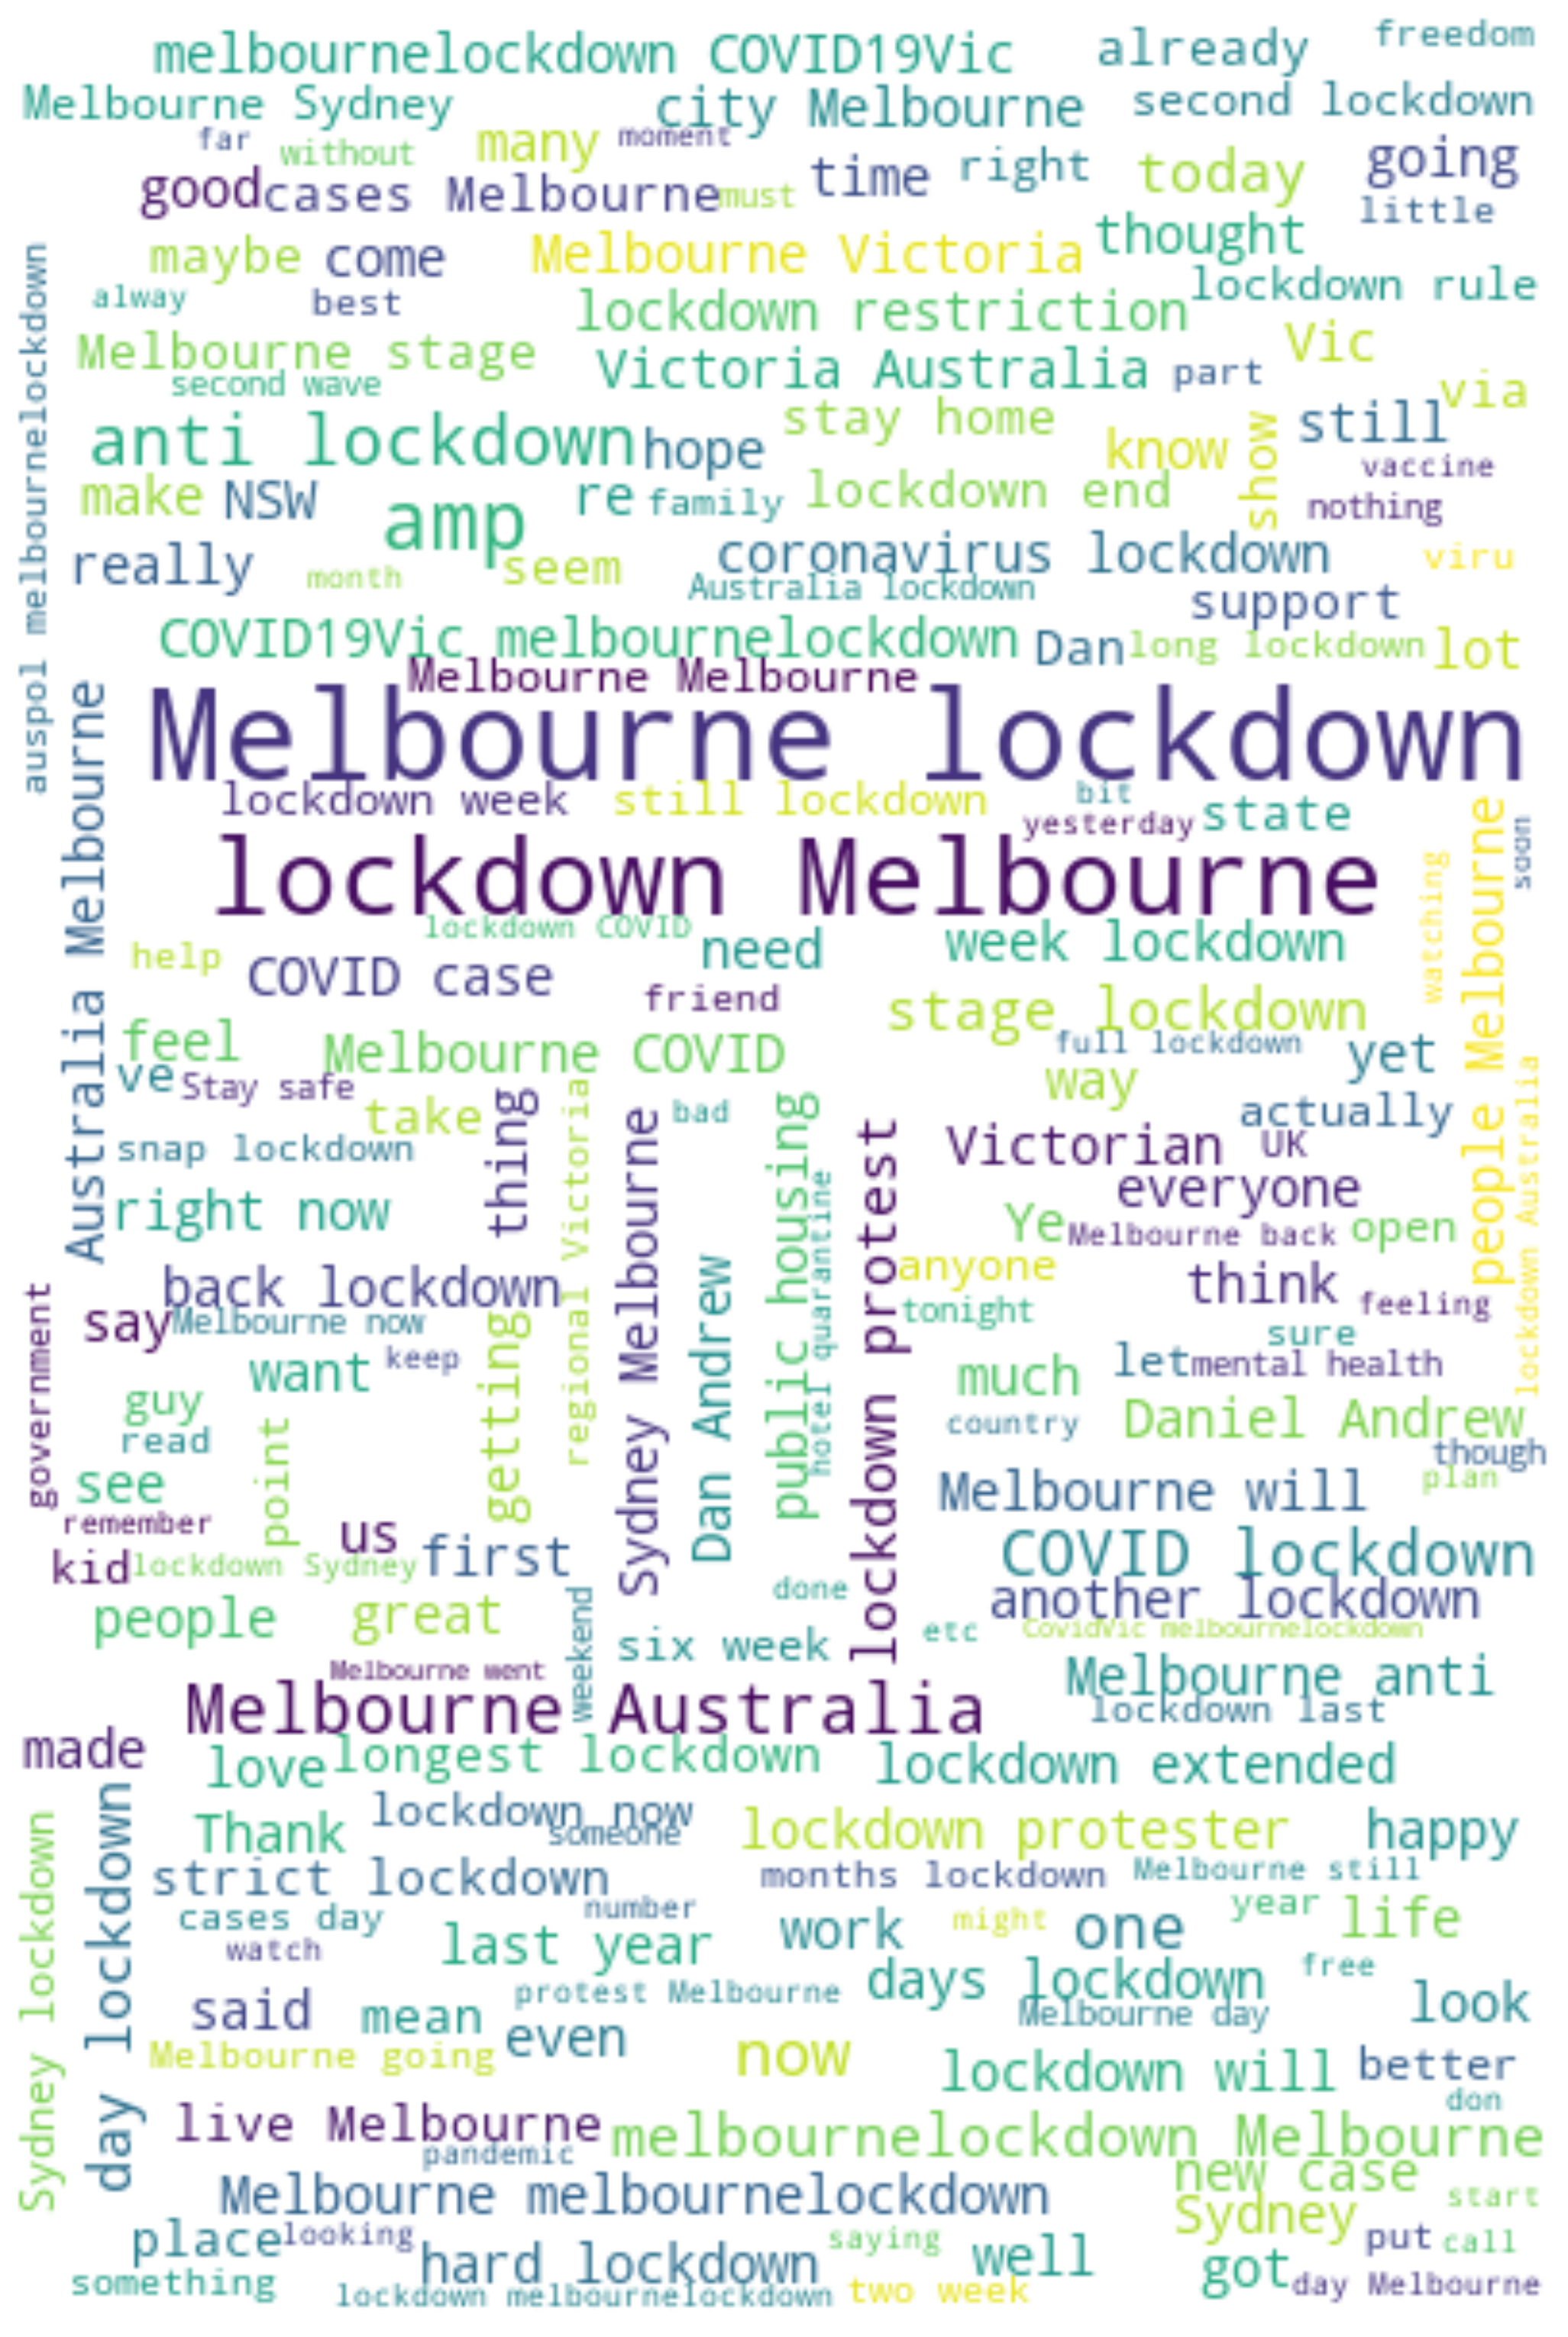

In [ ]:
plt.figure(figsize=(20,20), dpi=200)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getSubjectivity(text):
  """This function will get the subjectivity of the text entered into it"""
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def getPolarity(text):
  """This function will get the polarity of the text entered into it"""
  return TextBlob(text).sentiment.polarity

In [ ]:
Tweet_list['Subjectivity'] = Tweet_list['Text'].apply(getSubjectivity)

In [ ]:
Tweet_list['Polarity'] = Tweet_list['Text'].apply(getPolarity)

In [ ]:
# Create a function to compute the negative, neutral and positive sentiment of the text.
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

Tweet_list['Analysis'] = Tweet_list['Polarity'].apply(getAnalysis)

In [ ]:
Tweet_list

Datetime                   ID  ...  Polarity  Analysis
0       2021-11-28  1465105936805097474  ...  0.000000   Neutral
1       2021-11-28  1465104766841675784  ... -0.112727  Negative
2       2021-11-28  1465099857866100745  ... -0.047917  Negative
3       2021-11-28  1465097934605672449  ...  0.433333  Positive
4       2021-11-28  1465096696694775812  ...  0.100000  Positive
...            ...                  ...  ...       ...       ...
231049  2020-01-25  1220884235503845380  ...  0.000000   Neutral
231050  2020-01-25  1220873858531487744  ...  0.000000   Neutral
231051  2020-01-24  1220846412759355392  ...  0.000000   Neutral
231052  2020-01-14  1216984732530962433  ...  0.000000   Neutral
231053  2020-01-14  1216961654207856642  ...  0.270000  Positive

[231054 rows x 6 columns]

In [ ]:
# Print all Positive Tweets
j = 1
Sorted_Tweets = Tweet_list.sort_values(by=['Polarity'])
for i in range(0, Sorted_Tweets.shape[0]):
    if (Sorted_Tweets['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' +Sorted_Tweets['Text'][i])
        print()
        j = j+1

Streaming output truncated to the last 5000 lines.
12499) Focus the frustration back on to   n   
I live in Melbourne's lockdown.
Gp's were given more Pfizer in NSW that's why they have higher Vax rates. VIC, WA, SA &amp; QLD given less because   prioritised pfizer for NSW. 
 EggandSpoonRollout
 covid19aus  

12500) Hard &amp; fast lockdown restrictions to lift in regional Victoria, except Greater Shepparton, as Victoria records a fall to 221 COVID-19 cases   'ring of steel' around Melbourne to protect from movement to the regions

12501) Shepparton will still say under the same restrictions as Melbourne but the rest of the state will enjoy some eased restrictions from 11.59pm on Thursday night. This article spells them out  covid  covid19  lockdown  regions   

12502) Important lockdown change for single parents: 
Premier announced if you are a single parent in metro Melbourne you will now be able to access childcare- no need for a worker’s permit.

12503) In two more weeks Melbourne 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

98108)  Coronavirus live news:  US  cases pass 2.5m as  Australia considers new  lockdown in Melbourne  

98109) Coronavirus live news: US cases pass 2.5m as Australia considers new lockdown in Melbourne Coronavirus live news: US cases pass 2.5m as Australia considers new lockdown in Melbourne

 

98110)      __   Um the spikes definitely are related to the protests. In Melbourne Australia most of the cases are related to the protests and that put that state back onto lockdown. I’m sure that it’s the same in America. So where a mask and be safe cause you guys have millions of cases.

98111)  Coronavirus - US cases pass 2.5m as Australia considers new lockdown in Melbourne. US coronavirus cases hit new one-day high as states backtrack on reopening
   COVID19  DonaldTrump  GOP  Republicans

98112) Coronavirus live news: US cases pass 2.5m as Australia considers new lockdown in Melbourne  

98113)   48hrs after the BLM march in Melbourne

In [ ]:
# Print all Negative Tweets
j = 1
Sorted_Tweets = Tweet_list.sort_values(by=['Polarity'])
for i in range(0, Sorted_Tweets.shape[0]):
    if (Sorted_Tweets['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' +Sorted_Tweets['Text'][i])
        print()
        j = j+1

Streaming output truncated to the last 5000 lines.

12522)   Businesses in Victoria that are 500 km away from the nearest exposure site, in areas that have never seen Covid-19, are forced to close and their residents confined to their homes, or face being arrested.

It is madness here in Victoria.

 auspol  springst  melbournelockdown

12523) Sigh. Why do people insist on being selfish dicks when we go into lockdown? It’s hard, sure, but seriously there is more than enough info out there to know that protesting is only going to prolong it and putting lives at risk is not cool.  melbournelockdown

12524)  lockdown6  Covid19Vic  melbournelockdown 
Positive Attitude is the Key to all this,
Drunk...., is your 2nd option. 🍺✌

12525)     Of course! Just finished! Gotta burn those calories. And so helps my mental health in  melbournelockdown Riding with a woman in the US navy today.  BetterTogether  

12526)   Paul Kent says that the Queensland leaders are morons over their handling of the NR

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

53335) Victoria has recorded 74 new cases of COVID-19 as 3,000 social housing tenants in hard lockdown. Tonight a contingent of Queensland nurses is setting up base flying to Melbourne to help in the state's hour of need.      _Madsen  7NEWS  

53336) Victoria has recorded 74 new cases of COVID-19 as 3,000 social housing tenants in hard lockdown. Tonight a contingent of Queensland nurses is setting up base flying to Melbourne to help in the state's hour of need.      _Madsen  7NEWS  

53337) Victoria has recorded 74 new cases of COVID-19 as 3,000 social housing tenants in hard lockdown. Tonight a contingent of Queensland nurses is setting up base flying to Melbourne to help in the state's hour of need.      _Madsen  7NEWS  

53338) Victoria has recorded 74 new cases of COVID-19 as 3,000 social housing tenants in hard lockdown. Tonight a contingent of Queensland nurses is setting up base flying to Melbourne to help in the state's hour 

In [ ]:
# Percentage of Positive Tweets
Pos_Tweets = Tweet_list[Tweet_list['Analysis'] == 'Positive']
round((Pos_Tweets.shape[0] / Tweet_list.shape[0]) * 100, 1)

43.2

In [ ]:
# Percentage of Negative Tweets
Neg_Tweets = Tweet_list[Tweet_list['Analysis'] == 'Negative']
round((Neg_Tweets.shape[0] / Tweet_list.shape[0]) * 100, 1)

23.9

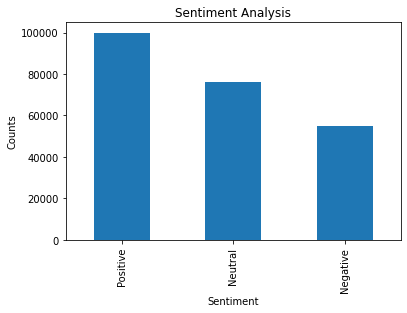

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
Tweet_list['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
Tweet_list

In [ ]:
Neg_Tweets = Tweet_list[Tweet_list['Analysis']=='Negative']
Neg_Tweets = Neg_Tweets.groupby(['Datetime'], as_index=False).count()
Neg_Tweets = Neg_Tweets[['Datetime', 'ID']]
Neg_Tweets.head()

Datetime  ID
0  2020-01-27   2
1  2020-02-01   1
2  2020-02-05  11
3  2020-02-06   1
4  2020-02-07   1

In [ ]:
Pos_Tweets =  Tweet_list[Tweet_list['Analysis']=='Positive']
Pos_Tweets = Pos_Tweets.groupby(['Datetime'], as_index=False).count()
Pos_Tweets = Pos_Tweets[['Datetime', 'ID']]
Pos_Tweets.head()

Datetime  ID
0  2020-01-14   1
1  2020-01-25   1
2  2020-01-27   1
3  2020-01-29   1
4  2020-02-01   1

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in Pos_Tweets.columns:
    fig.add_trace(go.Scatter(x=Pos_Tweets['Datetime'], y=Pos_Tweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in Neg_Tweets.columns:
    fig.add_trace(go.Scatter(x=Neg_Tweets['Datetime'], y=Neg_Tweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
Tweet_list[(Tweet_list == '2020-07-07').any(axis=1)]['Text']

Series([], Name: Text, dtype: object)

In [ ]:
Tweet_list['Datetime'] = pd.to_datetime(Tweet_list['Datetime'])

In [ ]:
# Filter by Lockdown Dates

Lockdown1 = Tweet_list[(Tweet_list['Datetime'] >= '2020-03-31') & (Tweet_list['Datetime']<='2020-05-12')]
Lockdown2 = Tweet_list[(Tweet_list['Datetime'] >= '2020-06-20') & (Tweet_list['Datetime']<='2020-10-27')]
Lockdown3 = Tweet_list[(Tweet_list['Datetime'] >= '2021-02-13') & (Tweet_list['Datetime']<='2021-02-17')]
Lockdown4 = Tweet_list[(Tweet_list['Datetime'] >= '2021-05-27') & (Tweet_list['Datetime']<='2021-06-10')]
Lockdown5 = Tweet_list[(Tweet_list['Datetime'] >= '2021-07-15') & (Tweet_list['Datetime']<='2021-07-27')]
Lockdown6 = Tweet_list[(Tweet_list['Datetime'] >= '2021-08-05') & (Tweet_list['Datetime']<='2021-10-21')]

In [ ]:
Lckdwn1_NegTweets = Lockdown1[Lockdown1['Analysis']=='Negative']
Lckdwn1_NegTweets = Lckdwn1_NegTweets.groupby(['Datetime'], as_index=False).count()
Lckdwn1_NegTweets = Lckdwn1_NegTweets[['Datetime', 'ID']]

Lckdwn1_PosTweets = Lockdown1[Lockdown1['Analysis']=='Positive']
Lckdwn1_PosTweets = Lckdwn1_PosTweets.groupby(['Datetime'], as_index=False).count()
Lckdwn1_Postweets = Lckdwn1_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in Lckdwn1_Postweets.columns:
    fig.add_trace(go.Scatter(x=Lckdwn1_PosTweets['Datetime'], y=Lckdwn1_Postweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in Lckdwn1_NegTweets.columns:
    fig.add_trace(go.Scatter(x=Lckdwn1_NegTweets['Datetime'], y=Lckdwn1_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
Lckdwn2_NegTweets = Lockdown2[Lockdown2['Analysis']=='Negative']
Lckdwn2_NegTweets = Lckdwn2_NegTweets.groupby(['Datetime'], as_index=False).count()
Lckdwn2_NegTweets = Lckdwn2_NegTweets[['Datetime', 'ID']]

Lckdwn2_PosTweets = Lockdown2[Lockdown2['Analysis']=='Positive']
Lckdwn2_PosTweets = Lckdwn2_PosTweets.groupby(['Datetime'], as_index=False).count()
Lckdwn2_Postweets = Lckdwn2_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in Lckdwn2_Postweets.columns:
    fig.add_trace(go.Scatter(x=Lckdwn2_PosTweets['Datetime'], y=Lckdwn2_Postweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in Lckdwn2_NegTweets.columns:
    fig.add_trace(go.Scatter(x=Lckdwn2_NegTweets['Datetime'], y=Lckdwn2_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
LckDwn3_NegTweets = Lockdown3[Lockdown3['Analysis']=='Negative']
LckDwn3_NegTweets = LckDwn3_NegTweets.groupby(['Datetime'], as_index=False).count()
LckDwn3_NegTweets = LckDwn3_NegTweets[['Datetime', 'ID']]

LckDwn3_PosTweets = Lockdown3[Lockdown3['Analysis']=='Positive']
LckDwn3_PosTweets = LckDwn3_PosTweets.groupby(['Datetime'], as_index=False).count()
LckDwn3_PosTweets = LckDwn3_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in LckDwn3_PosTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn3_PosTweets['Datetime'], y=LckDwn3_PosTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in LckDwn3_NegTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn3_NegTweets['Datetime'], y=LckDwn3_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
Lockdown4

Datetime                   ID  ...  Polarity  Analysis
81906  2021-06-10  1403139844805517313  ... -0.200000  Negative
81907  2021-06-10  1403138504687640579  ...  0.000000   Neutral
81908  2021-06-10  1403137633669242886  ...  0.136364  Positive
81909  2021-06-10  1403137411836612609  ...  0.157576  Positive
81910  2021-06-10  1403136799011053570  ...  0.152841  Positive
...           ...                  ...  ...       ...       ...
102791 2021-05-27  1397704352266063874  ...  0.159091  Positive
102792 2021-05-27  1397704312034267139  ...  0.162500  Positive
102793 2021-05-27  1397704250449223682  ... -0.433333  Negative
102794 2021-05-27  1397704225174343682  ...  0.323958  Positive
102795 2021-05-27  1397704130613837826  ... -0.300000  Negative

[20890 rows x 6 columns]

In [ ]:
LckDwn4_NegTweets = Lockdown4[Lockdown4['Analysis']=='Negative']
LckDwn4_NegTweets = LckDwn4_NegTweets.groupby(['Datetime'], as_index=False).count()
LckDwn4_NegTweets = LckDwn4_NegTweets[['Datetime', 'ID']]

LckDwn4_PosTweets = Lockdown4[Lockdown4['Analysis']=='Positive']
LckDwn4_PosTweets = LckDwn4_PosTweets.groupby(['Datetime'], as_index=False).count()
LckDwn4_PosTweets = LckDwn4_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in LckDwn4_PosTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn4_PosTweets['Datetime'], y=LckDwn4_PosTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in LckDwn4_NegTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn4_NegTweets['Datetime'], y=LckDwn4_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
Lockdown5

Datetime                   ID  ...  Polarity  Analysis
57033 2021-07-27  1420171843479105538  ...  0.116667  Positive
57034 2021-07-27  1420171664164225027  ...  0.100000  Positive
57035 2021-07-27  1420171537689153537  ... -0.097917  Negative
57036 2021-07-27  1420171099837325314  ...  0.285714  Positive
57037 2021-07-27  1420170155632435200  ...  0.250000  Positive
...          ...                  ...  ...       ...       ...
72737 2021-07-15  1415461845306015751  ...  0.000000   Neutral
72738 2021-07-15  1415461743921221633  ...  0.000000   Neutral
72739 2021-07-15  1415461684244664324  ...  0.000000   Neutral
72740 2021-07-15  1415461659653525507  ...  0.000000   Neutral
72741 2021-07-15  1415461236003643393  ... -0.028125  Negative

[15709 rows x 6 columns]

In [ ]:
LckDwn5_NegTweets = Lockdown5[Lockdown5['Analysis']=='Negative']
LckDwn5_NegTweets = LckDwn5_NegTweets.groupby(['Datetime'], as_index=False).count()
LckDwn5_NegTweets = LckDwn5_NegTweets[['Datetime', 'ID']]

LckDwn5_PosTweets = Lockdown5[Lockdown5['Analysis']=='Positive']
LckDwn5_PosTweets = LckDwn5_PosTweets.groupby(['Datetime'], as_index=False).count()
LckDwn5_PosTweets = LckDwn5_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in LckDwn5_PosTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn5_PosTweets['Datetime'], y=LckDwn5_PosTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in LckDwn5_NegTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn5_NegTweets['Datetime'], y=LckDwn5_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [ ]:
Lockdown6

Datetime                   ID  ...  Polarity  Analysis
5520  2021-10-21  1451337416187383809  ...  0.162698  Positive
5521  2021-10-21  1451337343319879680  ...  0.000000   Neutral
5522  2021-10-21  1451337306506289154  ...  0.318182  Positive
5523  2021-10-21  1451337300395266048  ...  0.136364  Positive
5524  2021-10-21  1451337104009560067  ...  0.445455  Positive
...          ...                  ...  ...       ...       ...
54636 2021-08-05  1423073713218416642  ...  0.000000   Neutral
54637 2021-08-05  1423072987327066114  ...  0.225000  Positive
54638 2021-08-05  1423072464574189571  ... -0.096875  Negative
54639 2021-08-05  1423072235225436166  ...  0.670000  Positive
54640 2021-08-05  1423071625977597955  ...  0.000000   Neutral

[49121 rows x 6 columns]

In [ ]:
LckDwn6_NegTweets = Lockdown6[Lockdown6['Analysis']=='Negative']
LckDwn6_NegTweets = LckDwn6_NegTweets.groupby(['Datetime'], as_index=False).count()
LckDwn6_NegTweets = LckDwn6_NegTweets[['Datetime', 'ID']]

LckDwn6_PosTweets = Lockdown6[Lockdown6['Analysis']=='Positive']
LckDwn6_PosTweets = LckDwn6_PosTweets.groupby(['Datetime'], as_index=False).count()
LckDwn6_PosTweets = LckDwn6_PosTweets[['Datetime', 'ID']]

In [ ]:
# Visualising Lockdown Sentiment by Date

import plotly.graph_objs as go
fig = go.Figure()
for col in LckDwn6_PosTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn6_PosTweets['Datetime'], y=LckDwn6_PosTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in LckDwn5_NegTweets.columns:
    fig.add_trace(go.Scatter(x=LckDwn6_NegTweets['Datetime'], y=LckDwn6_NegTweets['ID'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()